<a href="https://colab.research.google.com/github/michaeljmcardoso/RedeSocial-for-DataScience/blob/main/RedeSocial_for_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rede Social para Cientistas de Dados**

* Este Projeto é uma adaptação do Livro Data Science do Zero.
* No livro, você acompanha o dia a dia de um Cientista de Dados, que recebe demandas e precisa utilizar a linguagem Python para resolver problemas no seu novo emprego. O primeiro deles, é criar uma rede social dos cientista de dados chamada DataSciencester, utilizando dados dos seus colegas de trabalho.

  * **Objetivo:** criar uma rede social para cientistas de dados.

* Agora vamos ver como iniciar esse projeto.
 Primeiramente, iremos importar os pacotes a serem utilizados.

In [2]:
# importando os pacotes necessários
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt

# ===============================================
# rede social dos cientista de dados
# ===============================================

names = [
    'Joao',
    'Ana',
    'Tiago',
    'Carol',
    'Raquel',
    'Giuliano',
    'Rafael',
    'Natália',
    'Rodrigues',
    'Maria']

users = [{'id':i, 'name':name, 'friends':[]} for i, name in enumerate(names)]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


for i, j in friendships:
    users[i]["friends"].append(users[j]) # adicionar i como amigo de j
    users[j]["friends"].append(users[i]) # adicionar j como amigo de i


In [3]:
# ===============================================
# contando amigos
# ===============================================

def number_of_friends(user):
  """quantos amigos _user_ tem?"""
  return len(user["friends"])

total_connections = sum(number_of_friends(user) for user in users)
num_users = len(users)
avg_connections = total_connections / num_users


In [4]:
# criar uma lista (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
sorted(num_friends_by_id,    # classifique a lista
       key=lambda t: t[1],   # por num_friends
       reverse=True)         # do maior para o menor 


[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [6]:
# encontrando amigos com interesse em comum

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

# chaves são interesses, valores são listas de user_ids com esse interesse
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

# # chaves são user_ids, valores são listas de interesses para aquele user_id
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
   interests_by_user_id[user_id].append(interest)

def most_common_interest_with(user):
  return Counter(
      interested_user_id
      for interest in interests_by_user_id[user["id"]]
      for interested_user_id in user_ids_by_interest[interest]
      if interested_user_id != user["id"]  
  )

In [44]:
# salário e experiência em anos salary e tenure

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

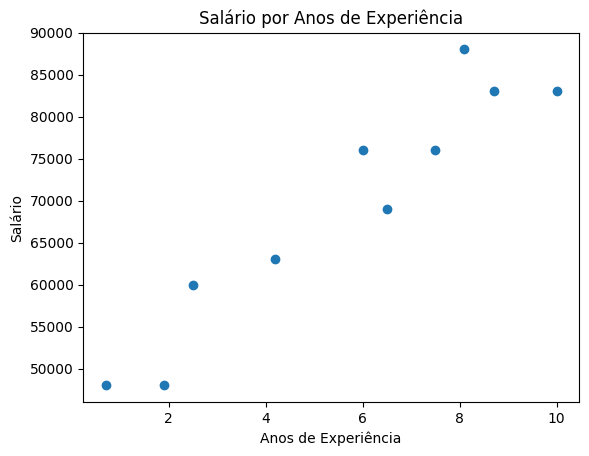

In [51]:
anos_de_experiencia = [8.7, 8.1, 0.7, 6, 6.5, 7.5, 2.5, 10, 1.9, 4.2]
salarios = [83000, 88000, 48000, 76000, 69000, 76000, 60000, 83000, 48000, 63000]

plt.scatter(anos_de_experiencia, salarios)

# definir um título
plt.title('Salário por Anos de Experiência')

# definindo os labels
plt.ylabel("Salário")
plt.xlabel("Anos de Experiência")

# exibir o plot
plt.show()

In [52]:
# As chaves são anos, os valores são listas de salários por anos de experiência
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

# As chaves são anos, cada valor é o salário médio associado ao número de anos de experiência
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

print(average_salary_by_tenure)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
